In [7]:
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image
from torchvision.transforms import Resize

class OcrDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file,delimiter='\t',header=None)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Tolch , as he is known in Tin Pan Alley , likes songs with a month in the title . He wrote


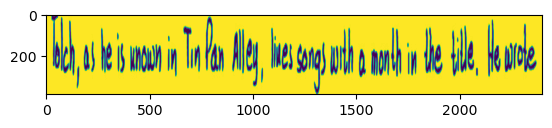

In [33]:
training_data = OcrDataset(annotations_file='../Dataset/IAM/gt_test.csv',img_dir='../Dataset/IAM/image',transform=Resize((384,2400)))
img,label = training_data.__getitem__(6)
plt.imshow(img[0,:,:])
print(label)

In [ ]:
test = pd.read_csv('../Dataset/IAM/gt_test.csv',delimiter='\t',header=None)
test.head()

In [10]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data,batch_size=32, shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [12]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {len(train_labels)}")

Feature batch shape: torch.Size([32, 1, 384, 384])
Labels batch shape: 32


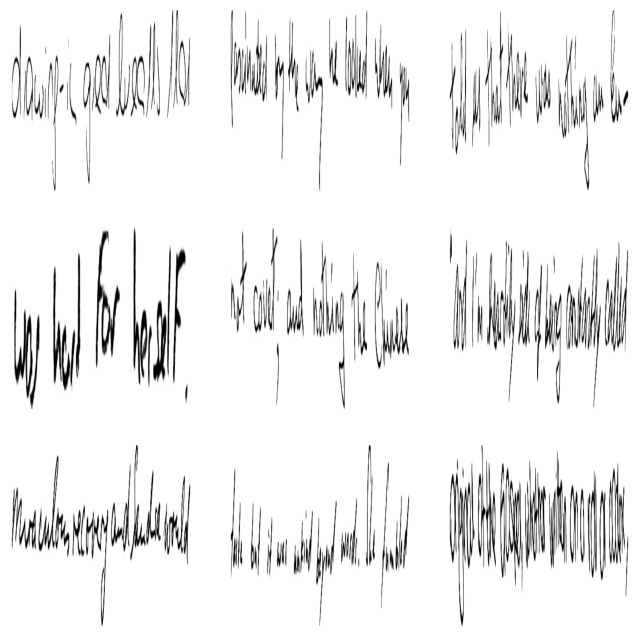

In [14]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
#     plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()